In [14]:
using DynamicalSystems
using Plots; gr()
using CairoMakie
using LinearAlgebra: norm

In [2]:
# Define Lorenz system
function lorenz(u, p, t)
    σ, ρ, β = p
    dx = zeros(3)
    du1 = σ*(u[2] - u[1]) 
    du2 = u[1]*(ρ - u[3]) - u[2]
    du3 = u[1]*u[2] - β*u[3]
    return SVector{3}(du1, du2, du3)
end

lorenz (generic function with 1 method)

In [3]:
# Initial conds
u0 = [0.0, 10.0, 0.0]

# Parameters
p = [10, 28, 8/3]

3-element Vector{Float64}:
 10.0
 28.0
  2.6666666666666665

In [4]:
# Create ds
ds = ContinuousDynamicalSystem(lorenz, u0, p)

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 rule f:      lorenz
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [10.0, 28.0, 2.66667]

In [5]:
# Calc trajectory
traj = trajectory(ds, 100)

3-dimensional Dataset{Float64} with 10001 points
  0.0       10.0        0.0
  0.951226  10.0352     0.0479007
  1.82768   10.3224     0.18683
  2.6593    10.839      0.416592
  3.47133   11.5678     0.744804
  4.28518   12.496      1.18585
  5.1191    13.6125     1.76047
  5.98858   14.9063     2.49569
  6.90648   16.3638     3.42487
  7.88291   17.9659     4.58749
  8.92478   19.6843     6.02839
 10.035     21.4776     7.796
 11.2116    23.2867     9.93892
  ⋮                    
 13.3629     9.49282   37.0828
 12.9317     8.19602   37.2547
 12.4201     6.9467    37.2213
 11.8418     5.77547   37.0029
 11.2119     4.70529   36.6246
 10.5456     3.75107   36.114
  9.85783    2.92022   35.4987
  9.16247    2.21357   34.8047
  8.47189    1.62682   34.0553
  7.79667    1.15186   33.2701
  7.1455     0.77822   32.4653
  6.52517    0.494141  31.6535

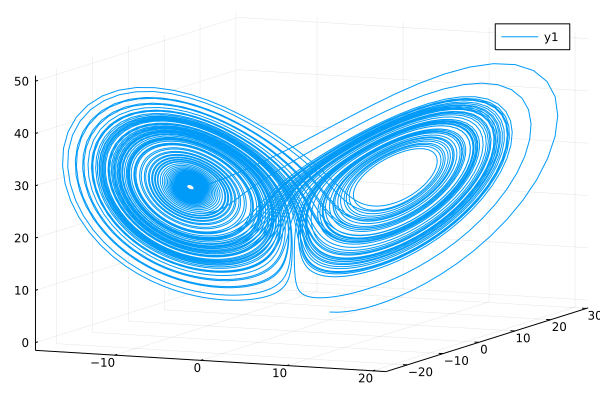

In [6]:
# Plot trajectory
plot(traj[:, 1], traj[:, 2], traj[:, 3])

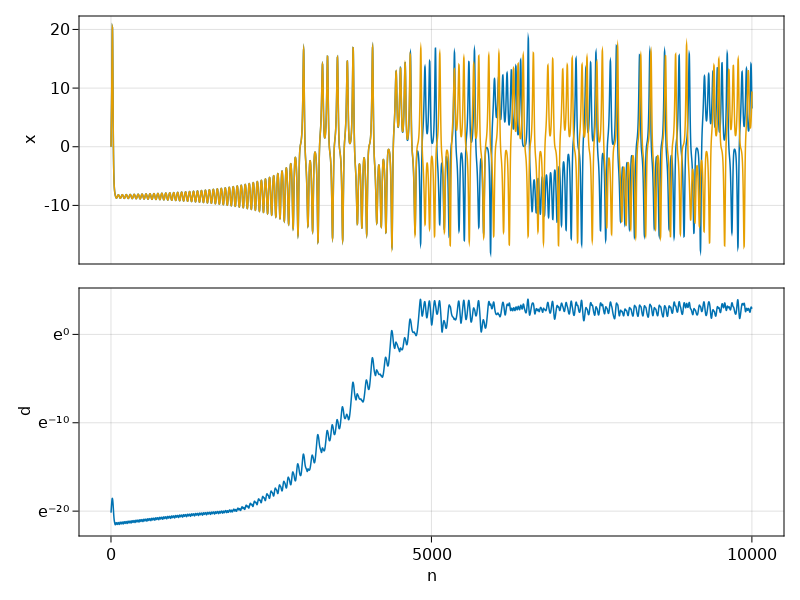

In [18]:
# Lyapunov exponents
# First simulate 2 different but "close" trajectories
# and look their difference
# The initial slope of the d vs n plot (before the curve saturates) 
# is approximately the maximum Lyapunov exponent!
tr1 = trajectory(ds, 100)

u2 = get_state(ds) + (1e-9 * ones(dimension(ds))) # "Nudge" the initial values
tr2 = trajectory(ds, 100, u2)

# Plot 
fig = Figure()

ax1 = Axis(fig[1,1]; ylabel = "x")
lines!(ax1, tr1[:, 1])
lines!(ax1, tr2[:, 1])
hidexdecorations!(ax1; grid = false)

ax2 = Axis(fig[2,1]; ylabel = "d", xlabel = "n", yscale = log)
d = [norm(tr1[i] - tr2[i]) for i in 1:length(tr2)]
lines!(ax2, d)
fig

In [22]:
## Lyapunov spectrum
λλ = lyapunovspectrum(ds, 10000, Δt = 0.1)
print(λλ)

## Maximum Lyapunov exponent
λ = lyapunov(ds, 10000.0, Δt = 10.0, Ttr = 100.0)
print(λ)

[0.8861386239528768, 0.0008260761249577322, -14.55354815065202]0.9046117670536139